<center>

**Python - Smartwatch Data Analysis --
The Analysis of smart watch data collected**

</center>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

data = pd.read_csv("dailyActivity_merged.csv")
print(data.head())

print(data.info())

print(data.describe())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

**Cleaning the data: Removing null values**

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Percentage of null values per column:
Id                          0.0
ActivityDate                0.0
TotalSteps                  0.0
TotalDistance               0.0
TrackerDistance             0.0
LoggedActivitiesDistance    0.0
VeryActiveDistance          0.0
ModeratelyActiveDistance    0.0
LightActiveDistance         0.0
SedentaryActiveDistance     0.0
VeryActiveMinutes           0.0
FairlyActiveMinutes         0.0
LightlyActiveMinutes        0.0
SedentaryMinutes            0.0
Calories                    0.0
dtype: float64


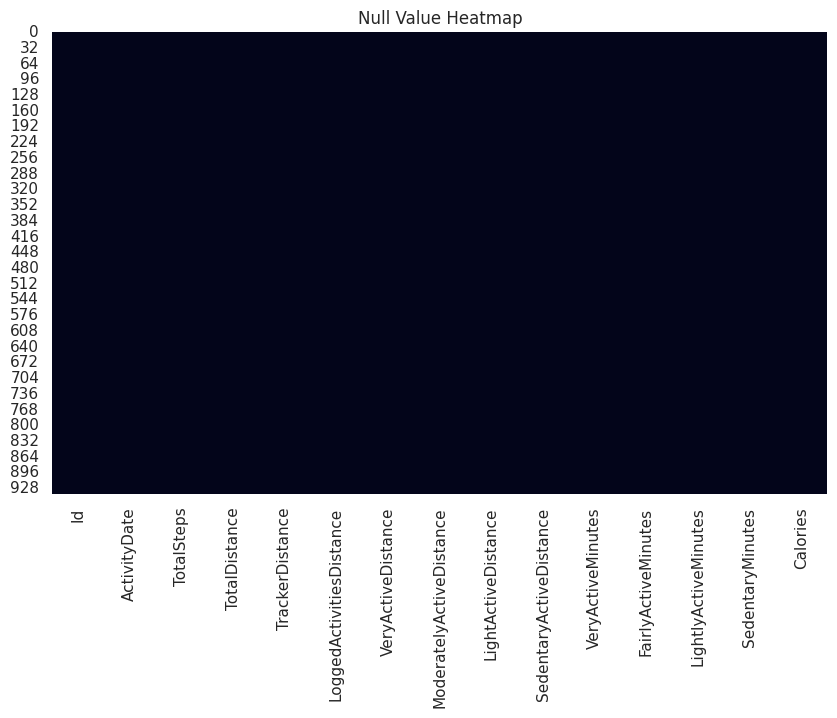

In [ ]:
print(data.isnull().sum())

# Calculate and display percentage of null values
null_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPercentage of null values per column:")
print(null_percentage)

# Visualize null values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Null Value Heatmap')
plt.show()

**Data information**

In [ ]:
print("Data Information:")
print(data.info())

print("\nFirst 5 Rows:")
print(data.head())

print("\nData Types:")
print(data.dtypes)

print("\nSummary Statistics:")
print(data.describe())

duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

for column in data.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {column}:")
    print(data[column].unique())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

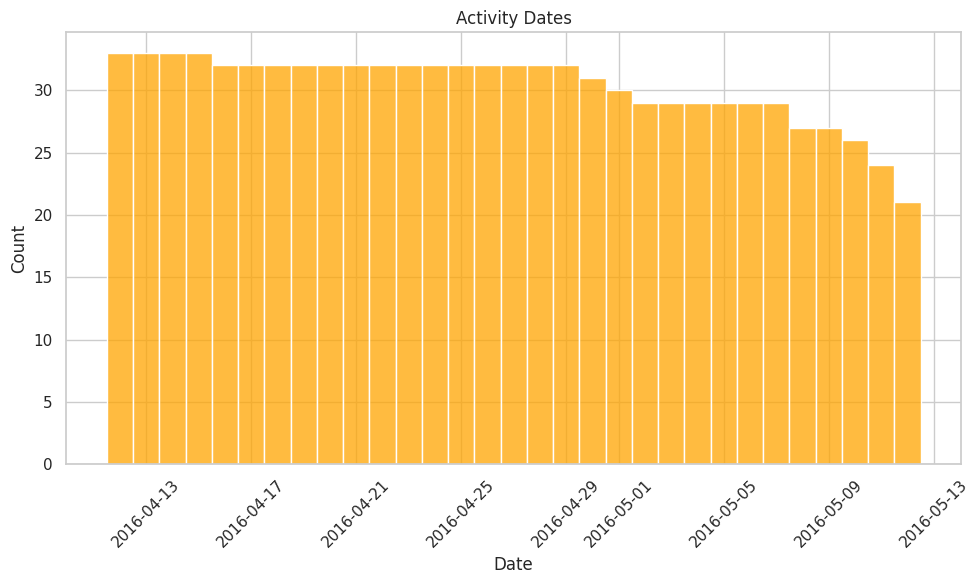

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

In [ ]:
# Changing datatype of ActivityDate
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"],
                                      format="%m/%d/%Y")

# Displaying the updated data types
print(data.info())

# Additional Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a style for the plots
sns.set(style="whitegrid")

# Distribution of Dates
plt.figure(figsize=(10, 6))
sns.histplot(data['ActivityDate'].dt.date, kde=False, color='orange')
plt.title('Activity Dates')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying a sample of the data
print(data.head())


**In examining the dataset, it becomes evident that it includes various categories of physical activity, each represented by its own column. These categories encompass a range of activity levels, from the most vigorous ('very active') to moderate ('fairly active'), mild ('lightly active'), and even minimal movement ('sedentary'). To simplify our analysis and gain a more holistic understanding of the data, it is advisable to aggregate these individual columns into a single metric: 'total activity minutes'. This approach will enable us to proceed with a more streamlined and comprehensive examination of the overall activity data.**

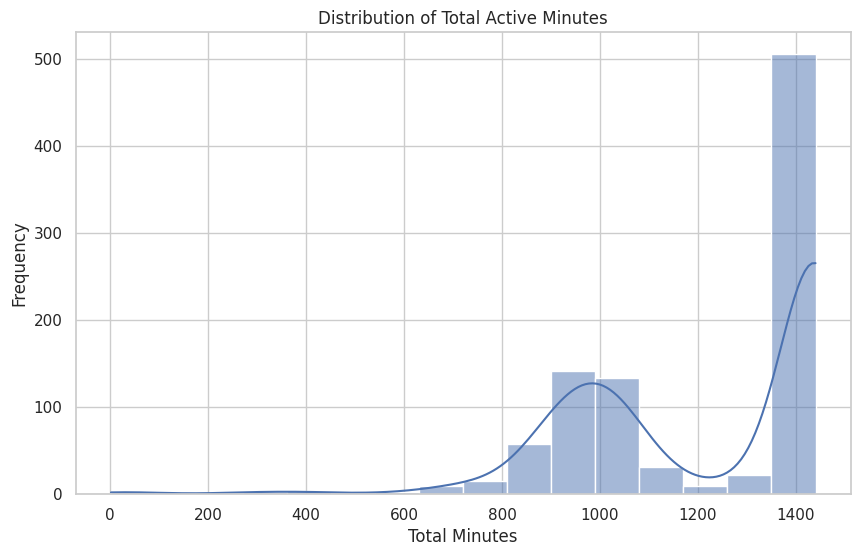

673    1440
889    1440
238    1440
99     1440
829     905
Name: TotalMinutes, dtype: int64


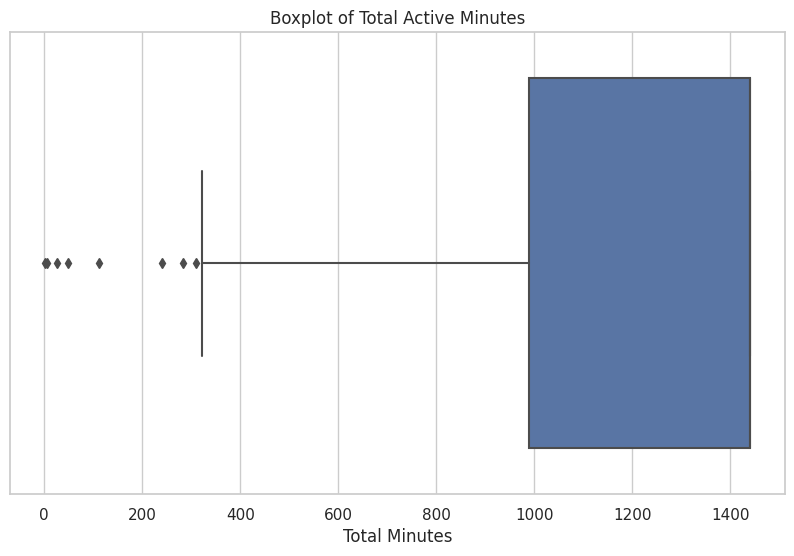

In [ ]:
# Calculating Total Minutes
data["TotalMinutes"] = (data["VeryActiveMinutes"] +
                        data["FairlyActiveMinutes"] +
                        data["LightlyActiveMinutes"] +
                        data["SedentaryMinutes"])




# Visualization - Histogram of Total Minutes
plt.figure(figsize=(10, 6))
sns.histplot(data["TotalMinutes"], kde=True)
plt.title('Distribution of Total Active Minutes')
plt.xlabel('Total Minutes')
plt.ylabel('Frequency')
plt.show()

# Displaying a random sample
print(data["TotalMinutes"].sample(5))

# Boxplot for Total Minutes
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["TotalMinutes"])
plt.title('Boxplot of Total Active Minutes')
plt.xlabel('Total Minutes')
plt.show()


**Descriptive statistics of the dataset**

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000   

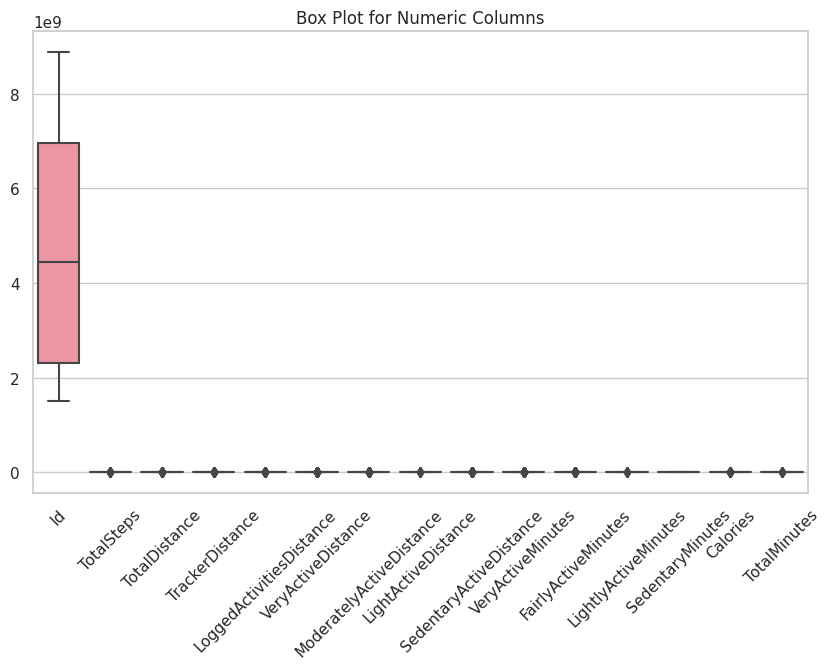

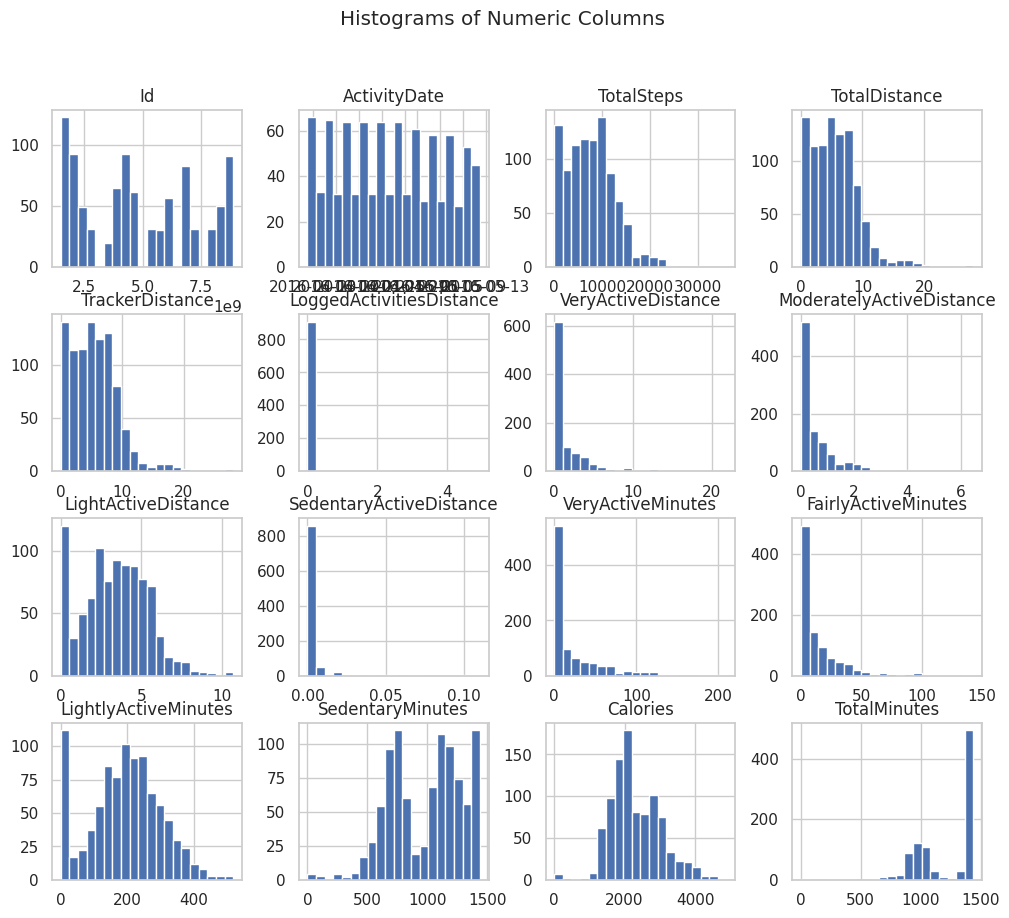

<ipython-input-19-0f92fccf02d4>:19: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



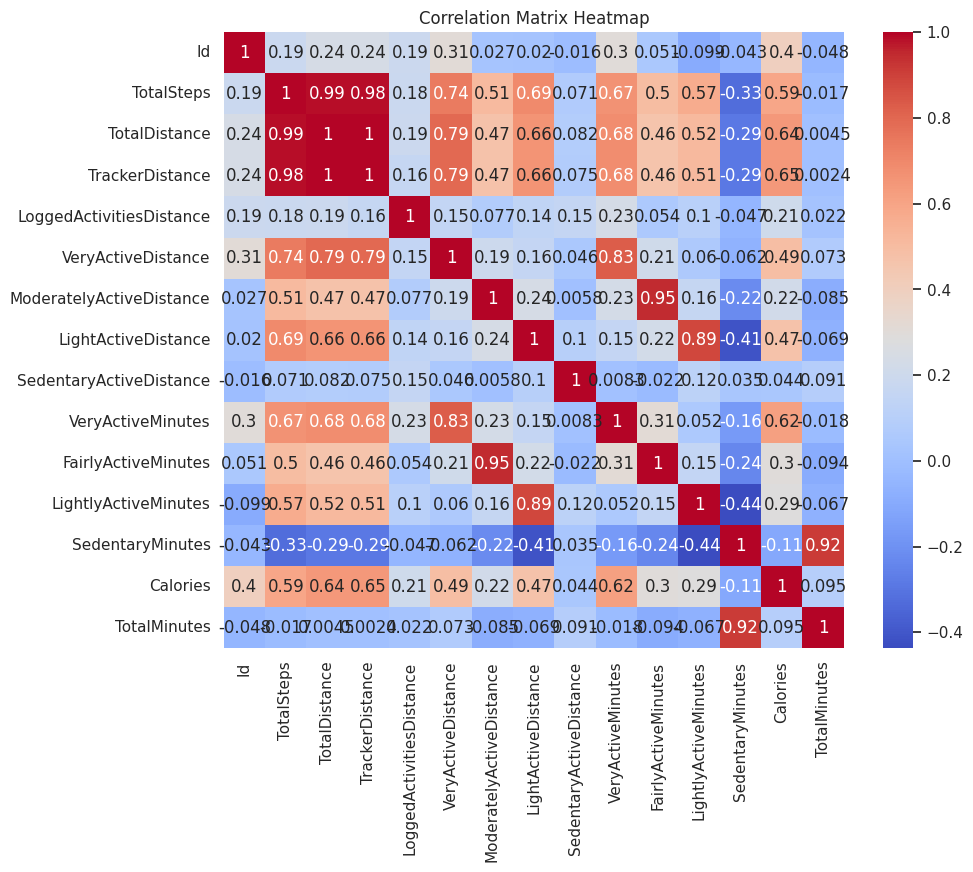

In [ ]:
# Display basic statistical details
descriptive_stats = data.describe()
print(descriptive_stats)

# Visualize the descriptive statistics using a box plot for each numeric column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title("Box Plot for Numeric Columns")
plt.xticks(rotation=45)
plt.show()

# Display histograms for each numeric column to understand distribution
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numeric Columns")
plt.show()

# Correlation matrix heatmap to understand relationships between variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


**Analyzing the Smartwatch Data**

In [ ]:
# Existing scatter plot
figure = px.scatter(data_frame=data, x="Calories", y="TotalSteps", size="VeryActiveMinutes",
                    trendline="ols",
                    title="Relationship between Calories & Total Steps")

# Add a histogram subplot for Calories
hist_calories = px.histogram(data_frame=data, x="Calories", marginal="box",
                             title="Distribution of Calories")

# Combine scatter plot and histogram in a subplot layout
from plotly.subplots import make_subplots
final_fig = make_subplots(rows=2, cols=1,
                          shared_xaxes=True,
                          subplot_titles=("The distribution of Calories against Total Steps", "Calories Distribution"))

# Update layout with scatter and histogram
final_fig.add_trace(figure['data'][0], row=1, col=1)
final_fig.add_trace(hist_calories['data'][0], row=2, col=1)

# Update layout for better visualization
final_fig.update_layout(height=800, showlegend=False)

# Show the final figure
final_fig.show()


**It is evident that a direct correlation exists between the cumulative steps taken and the daily caloric expenditure. Let us now shift our focus to examining the mean duration of physical activity per day.**

In [ ]:
# Labels and data for the pie chart
label = ["Very Active Minutes", "Fairly Active Minutes", "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]].mean()

# Custom color palette
colors = ['gold', 'lightgreen', "pink", "grey"]

# Create a subplot with 3D pie chart
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

# Add a 3D pie chart
fig.add_trace(go.Pie(labels=label, values=counts, name="Activity", marker=dict(colors=colors), hole=.3), 1, 1)

# Update chart layout for a modern look
fig.update_layout(
    title_text='Total Active Minutes',
    annotations=[dict(text='Activity', x=0.18, y=0.5, font_size=20, showarrow=False)],
    autosize=False,
    width=700,
    height=700,
    paper_bgcolor="white"
)

# Update traces for better visualization and interaction
fig.update_traces(
    hoverinfo='label+percent+value',
    textinfo='percent',
    textfont_size=20,
    pull=[0.1, 0, 0, 0]
)

# Show the figure
fig.show()


**We altered the format of the 'ActivityDate' column, converting it into a datetime format in the earlier step. Now, let's proceed to identify the corresponding weekdays for each entry in this column. Subsequently, we will expand our dataset by introducing an additional column named "Day", which will include these weekdays.**

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object


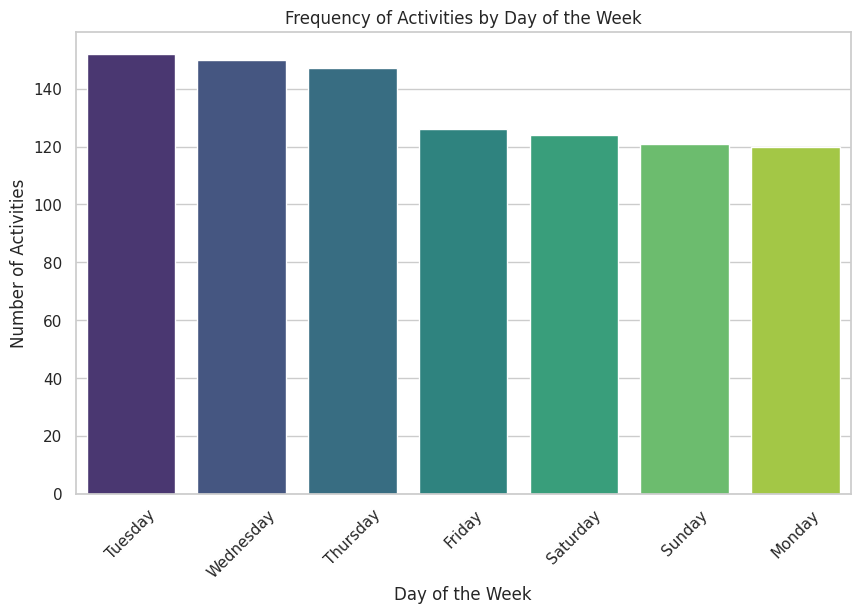

In [ ]:
# Extracting day name from the 'ActivityDate' column
data["Day"] = data["ActivityDate"].dt.day_name()

# Display the first few entries
print(data["Day"].head())

# Count the occurrences of each day
day_counts = data["Day"].value_counts()

# Plotting the counts of each day
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")
plt.title('Frequency of Activities by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)
plt.show()


**Activity minutes for each day of the week**

In [ ]:
fig = go.Figure()

# Create a bar chart for Very Active Minutes
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["VeryActiveMinutes"],
    name='Very Active',
    marker_color='purple'
))

# Create a bar chart for Fairly Active Minutes
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["FairlyActiveMinutes"],
    name='Fairly Active',
    marker_color='green'
))

# Create a bar chart for Lightly Active Minutes
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["LightlyActiveMinutes"],
    name='Lightly Active',
    marker_color='pink'
))

# # Create a line chart for Total Calories Burned
# fig.add_trace(go.Scatter(
#     x=data["Day"],
#     y=data["CaloriesBurned"],
#     mode='lines+markers',
#     name='Calories Burned',
#     line=dict(color='blue', width=2)
# ))

# # Create a line chart for Steps Taken
# fig.add_trace(go.Scatter(
#     x=data["Day"],
#     y=data["Steps"],
#     mode='lines+markers',
#     name='Steps Taken',
#     line=dict(color='orange', width=2)
# ))

# Customize the layout
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Smartwatch Data Analysis',
    xaxis_title='Day',
    yaxis_title='Minutes / Count',
    legend=dict(
        x=0.01,
        y=0.99
    )
)

# Show the figure
fig.show()


**Number of inactive minutes on each day of the week**

In [ ]:
# Create a 3D Pie Chart for Inactive Minutes Daily
fig = go.Figure(data=[go.Pie(labels=label, values=counts, pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])])
fig.update_layout(title_text='Inactive Minutes Daily (3D Pie Chart)')

# Create a Bar Chart for Inactive Minutes Daily
bar_fig = go.Figure(data=[go.Bar(x=label, y=counts, marker_color=colors)])
bar_fig.update_layout(title_text='Inactive Minutes Daily (Bar Chart)')

# Create a Donut Chart for Inactive Minutes Daily
donut_fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.4)])
donut_fig.update_layout(title_text='Inactive Minutes Daily (Donut Chart)')

# Create a Sunburst Chart for Inactive Minutes Daily
sunburst_fig = go.Figure(go.Sunburst(
    labels=label,
    parents=[""] * len(label),
    values=counts,
))
sunburst_fig.update_layout(title_text='Inactive Minutes Daily (Sunburst Chart)')

# Display all the visualizations
fig.show()
bar_fig.show()
donut_fig.show()
sunburst_fig.show()
